## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Analysis

In [3]:
intrusion=pd.read_csv('/content/drive/MyDrive/dataset/IoT Network Intrusion Dataset.csv')
intrusion.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
intrusion.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [ ]:
intrusion.columns.tolist()

In [5]:
intrusion['Cat'].unique()

array(['Mirai', 'DoS', 'Scan', 'Normal', 'MITM ARP Spoofing'],
      dtype=object)

In [6]:
intrusion['Cat'].nunique()

5

In [4]:
intrusion_data=intrusion.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port','Sub_Cat'], axis=1)

In [ ]:
x = intrusion_data.columns.tolist()
y = intrusion_data.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

In [5]:
Cat_map = {
    'Normal' : 0,
    'Mirai' : 1,
    'DoS' : 2,
    'Scan' : 3,
    'MITM ARP Spoofing' : 4,
}

In [6]:
intrusion_cat = intrusion_data.drop(['Label'], axis=1)
cat_data = intrusion_cat['Cat'].map(Cat_map)
intrusion_cat['Cat'] = cat_data
print(intrusion_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10101        17             75             1             1   
1       554         6           5310             1             2   
2      9020         6            141             0             3   
3      9020         6            151             0             2   
4      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            982.0           1430.0            982.0            982.0   
1              0.0              0.0              0.0              0.0   
2              0.0           2806.0              0.0              0.0   
3              0.0           2776.0              0.0              0.0   
4            886.0            420.0            452.0            434.0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0             982.0  ...                 0          0.0         0.0   
1         

In [7]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

intrusion_label = intrusion_data.drop(['Cat'], axis=1)
label_data = intrusion_label['Label'].map(Label_map)
intrusion_label['Label'] = label_data
print(intrusion_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10101        17             75             1             1   
1       554         6           5310             1             2   
2      9020         6            141             0             3   
3      9020         6            151             0             2   
4      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            982.0           1430.0            982.0            982.0   
1              0.0              0.0              0.0              0.0   
2              0.0           2806.0              0.0              0.0   
3              0.0           2776.0              0.0              0.0   
4            886.0            420.0            452.0            434.0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0             982.0  ...                 0          0.0         0.0   
1         

In [8]:
intrusion_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,2
2,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,3
3,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,8043,17,277,1,1,18.0,18.0,18.0,18.0,18.0,...,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1
625779,554,6,1658,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,2
625780,9020,6,77,1,1,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,3
625781,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,...,0,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0


In [9]:
intrusion_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1
2,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1
3,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,8043,17,277,1,1,18.0,18.0,18.0,18.0,18.0,...,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1
625779,554,6,1658,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1
625780,9020,6,77,1,1,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1
625781,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,...,0,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0


In [10]:
X = intrusion_cat.drop(['Cat'], axis=1)
X.shape
y=intrusion_cat['Cat']
y.shape

(625783,)

In [11]:
print(X.columns.isnull().sum())

0


In [12]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [13]:
np.where(X.values >= np.finfo(np.float64).max)

(array([  4532,   4532,   6605,   6605,   7463,   7463,   7962,   7962,
         12705,  12705,  16058,  16058,  17045,  17045,  22333,  22333,
         26127,  26127,  28813,  28813,  29211,  29211,  31675,  31675,
         32300,  32300,  33269,  33269,  33980,  33980,  36362,  36362,
         37646,  37646,  38756,  38756,  43787,  43787,  44066,  44066,
         44468,  44468,  44840,  44840,  46300,  46300,  47302,  47302,
         51387,  51387,  52841,  52841,  54344,  54344,  55902,  55902,
         56859,  56859,  58637,  58637,  61018,  61018,  61498,  61498,
         61653,  61653,  63240,  63240,  65059,  65059,  67289,  67289,
         67518,  67518,  69883,  69883,  70168,  70168,  71215,  71215,
         73611,  73611,  77077,  77077,  78190,  78190,  81953,  81953,
         82939,  82939,  84657,  84657,  84872,  84872,  85372,  85372,
         85729,  85729,  92021,  92021,  93122,  93122,  94610,  94610,
         96212,  96212,  99012,  99012, 103193, 103193, 104158, 

In [14]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [19]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.690964,1.000000,-0.998500,-0.989247,-1.000000,-0.982120,-0.996301,0.341530,0.341530,0.341530,...,-0.989247,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998500,-1.000000,-0.998500,-0.998500
1,-0.983051,-0.294118,-0.893783,-0.989247,-0.996422,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.946886,-0.932570,-0.914897,-0.978874
2,-0.724037,-0.294118,-0.997180,-1.000000,-0.992844,-1.000000,-0.992743,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998590,-0.999979,-0.998580,-0.998600
3,-0.724037,-0.294118,-0.996980,-1.000000,-0.996422,-1.000000,-0.992820,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.996979,-1.000000,-0.996979,-0.996979
4,-0.941870,1.000000,-0.996940,-0.978495,-1.000000,-0.983868,-0.998914,-0.382514,-0.407104,-0.394809,...,-0.978495,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998470,-0.999979,-0.998460,-0.998480


In [16]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [17]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [18]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [19]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

<ipython-input-19-46c2a3c97f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==np.inf]=np.nan


### Splitting Data


In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [25]:
y_train.head()

499990    1
317578    1
255711    1
389744    1
17527     1
Name: Cat, dtype: int64

### Features Extraction

In [ ]:
# print(X_train.columns[rfecv.get_support()])

In [ ]:
# selected_features = X_train.columns[rfecv.get_support()]
# selected_features=selected_features.tolist()

In [ ]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

In [ ]:
# features_removed=(set(X_train.columns)-set(top_64_features))
# features_removed

In [21]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean']

In [22]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [23]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

from keras.models import load_model, Model

In [28]:


X_train_array = X_train.values
X_val_array = X_val.values
X_test_array = X_test.values

# Now, you can reshape the numpy arrays
X_train = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_val = X_val_array.reshape(X_val_array.shape[0], X_val_array.shape[1], 1)
X_test = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

cnn1 = load_model('/content/drive/MyDrive/CNN1D_iot_300mb_5epoch.h5')
cnn1.layers.pop()
cnn1.layers.pop()

cnn1.add(Dense(512, activation='relu', name="dense_a"))
cnn1.add(Dense(units=5, activation='sigmoid', name="dense_b"))

for layer in cnn1.layers[:-2]:
    layer.trainable = False

cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = cnn1.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val),
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

Epoch 1/5
11734/11734 [==============================] - 271s 23ms/step - loss: 0.6513 - accuracy: 0.7564 - val_loss: 0.5637 - val_accuracy: 0.7647
Epoch 2/5
11734/11734 [==============================] - 265s 23ms/step - loss: 0.5777 - accuracy: 0.7648 - val_loss: 0.5368 - val_accuracy: 0.7714
Epoch 3/5
11734/11734 [==============================] - 236s 20ms/step - loss: 0.5592 - accuracy: 0.7694 - val_loss: 0.5216 - val_accuracy: 0.7774
Epoch 4/5
11734/11734 [==============================] - 271s 23ms/step - loss: 0.5494 - accuracy: 0.7730 - val_loss: 0.5126 - val_accuracy: 0.7782
Epoch 5/5
11734/11734 [==============================] - 269s 23ms/step - loss: 0.5429 - accuracy: 0.7750 - val_loss: 0.5057 - val_accuracy: 0.7900


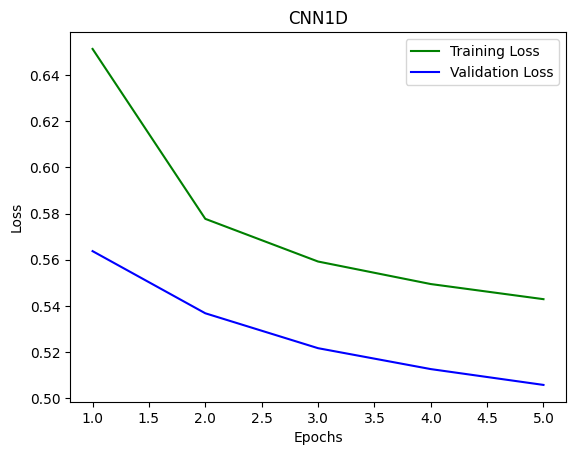

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 6)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

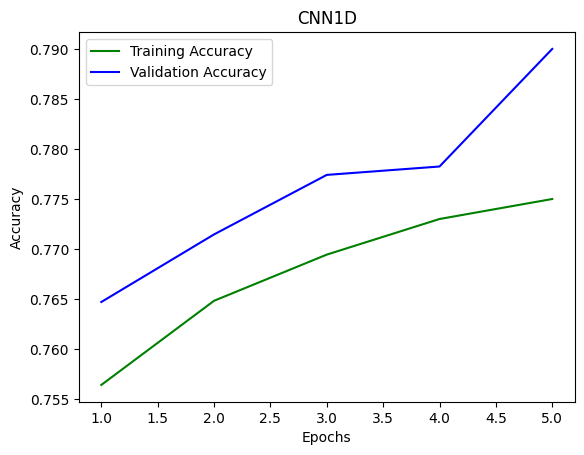

In [30]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
y_pred = cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

3912/3912 [==============================] - 55s 14ms/step


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 79.01

Precision: 79.03
Recall: 79.01
F1-score: 76.35



In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[ 1968  5233     7   803     4]
 [  309 77608    51  5030   138]
 [   10   191 11648    20     9]
 [  120  8432     3  6487    11]
 [    3  4539     0  1363  1170]]


In [34]:
np.unique(y_test)

array([0, 1, 2, 3, 4])

In [35]:
np.unique(y_pred_classes)

array([0, 1, 2, 3, 4])

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','Mirai','DoS','Scan','MITM ARP Spoofing'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.82      0.25      0.38      8015
            Mirai       0.81      0.93      0.87     83136
              DoS       0.99      0.98      0.99     11878
             Scan       0.47      0.43      0.45     15053
MITM ARP Spoofing       0.88      0.17      0.28      7075

         accuracy                           0.79    125157
        macro avg       0.79      0.55      0.59    125157
     weighted avg       0.79      0.79      0.76    125157



In [37]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)

category = ['Normal','Mirai','DoS','Scan','MITM ARP Spoofing']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.948153,1968.0,116700.0,442.0,6047.0
1,Mirai,0.808856,77608.0,23626.0,18395.0,5528.0
2,DoS,0.997675,11648.0,113218.0,61.0,230.0
3,Scan,0.873902,6487.0,102888.0,7216.0,8566.0
4,MITM ARP Spoofing,0.951525,1170.0,117920.0,162.0,5905.0


In [38]:
cnn1.save('cnn1d_intrusion_294mb_5epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Binary Classification

In [24]:
X = intrusion_label.drop(['Label'], axis=1)
X.shape
y=intrusion_label['Label']
y.shape

(625783,)

In [25]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [26]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [27]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [28]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [29]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

In [30]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [31]:
from keras.models import load_model, Model

bi_cnn1 = load_model('/content/drive/MyDrive/CNN1D_iot_300mb_5epoch.h5')
bi_cnn1.layers.pop()
bi_cnn1.layers.pop()

bi_cnn1.add(Dense(256, activation='relu', name='dense_a'))
bi_cnn1.add(Dense(units=2, activation='softmax', name='dense_b'))

for layer in bi_cnn1.layers[:-2]:
    layer.trainable = False

bi_cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn1.fit(X_train, y_train, epochs=7, validation_data=(X_val, y_val),
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/7
11734/11734 [==============================] - 247s 21ms/step - loss: 0.2057 - accuracy: 0.9355 - val_loss: 0.1771 - val_accuracy: 0.9360
Epoch 2/7
11734/11734 [==============================] - 276s 24ms/step - loss: 0.1807 - accuracy: 0.9360 - val_loss: 0.1626 - val_accuracy: 0.9362
Epoch 3/7
11734/11734 [==============================] - 237s 20ms/step - loss: 0.1735 - accuracy: 0.9372 - val_loss: 0.1559 - val_accuracy: 0.9397
Epoch 4/7
11734/11734 [==============================] - 238s 20ms/step - loss: 0.1693 - accuracy: 0.9386 - val_loss: 0.1517 - val_accuracy: 0.9417
Epoch 5/7
11734/11734 [==============================] - 272s 23ms/step - loss: 0.1669 - accuracy: 0.9393 - val_loss: 0.1492 - val_accuracy: 0.9422
Epoch 6/7
11734/11734 [==============================] - 245s 21ms/step - loss: 0.1649 - accuracy: 0.9399 - val_loss: 0.1471 - val_accuracy: 0.9438
Epoch 7/7
11734/11734 [==============================] - 236s 20ms/step - loss: 0.1627 - accuracy: 0.9407 - val_

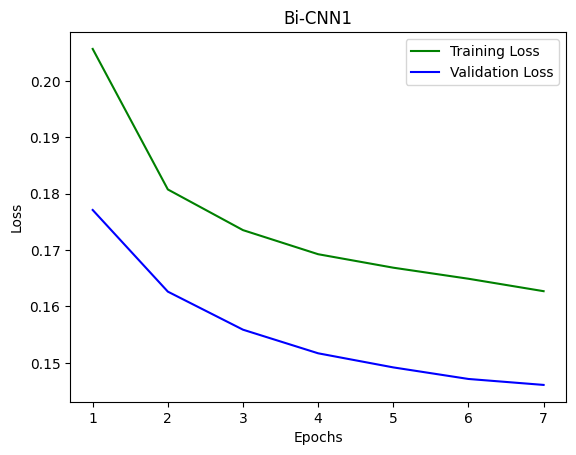

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 8)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

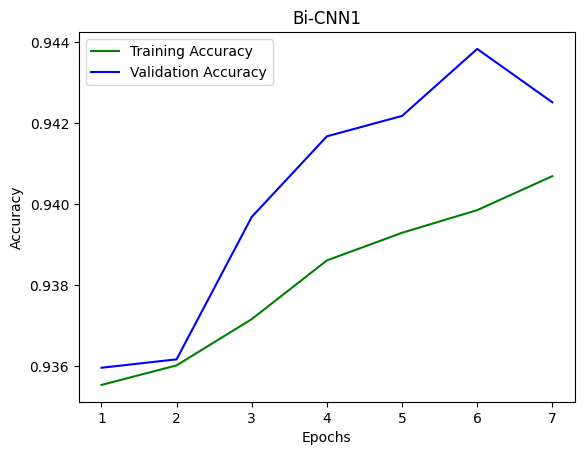

In [33]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 8)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
y_pred = bi_cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

3912/3912 [==============================] - 57s 14ms/step

Testing Accuracy: 94.23

Precision: 94.29
Recall: 94.23
F1-score: 92.00



In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.95      0.10      0.19      8015
     Anamoly       0.94      1.00      0.97    117142

    accuracy                           0.94    125157
   macro avg       0.95      0.55      0.58    125157
weighted avg       0.94      0.94      0.92    125157



In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)

category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.942288,833.0,117101.0,41.0,7182.0
1,Anomaly,0.942288,117101.0,833.0,7182.0,41.0


In [42]:
bi_cnn1.save('bi_cnn1_intrusion_294_7_epochs.h5')